# The Witcher Network Analysis

The Witcher is a series of fantasy novels written by Andrzej Sapkowski, which was later adapted into video games and a Netflix series. The series has a big range of characters with various social interactions between them.

The dataset contains the characters from The Witcher and their relationships. It's a great dataset to use for analyzing and visualizing social interactions and relationships. For this project, I have used the Networkx library to do a simple network analysis, and Pandas to do an exploratory data analysis.

In [251]:
#Loading libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [252]:
#Reading in the file
df = pd.read_csv('witcher_network.csv')

Lets take a look at the first five entries of the dataset!

In [253]:
print("\nThere are", df.shape[0], "rows and", df.shape[1], "columns in this dataset.")
print("\nThe first five rows are:")
display(df.head())
print("\nColumn types:\n")
print(df.dtypes)


There are 2600 rows and 6 columns in this dataset.

The first five rows are:


Unnamed: 0   Source   Target        Type  Weight  book
0           0  Velerad   Geralt  Undirected       1     1
1           1   Geralt  Foltest  Undirected       5     1
2           2  Foltest   Geralt  Undirected       4     1
3           3     Adda   Geralt  Undirected       1     1
4           4   Geralt   Ostrit  Undirected       4     1


Column types:

Unnamed: 0     int64
Source        object
Target        object
Type          object
Weight         int64
book           int64
dtype: object


The columns info are as follows:
1. **Source & Target**: the two characters who have had an interaction
2. **Type**: all connections for this dataset are undirected meaning they are bidirectional
3. **Weight**: How many interactions has each set of characters had
4. **Book**: book # from which this character set is from --> NOTE: two characters may appear multiple times in the dataset but in different books.

### 1. Defining Functions

A. Creates a Networkx class graph using the dataframe.

In [254]:
def create_network(df):
    G=nx.Graph()
    from collections import defaultdict
    d = defaultdict(set)
    for row in df.itertuples():
        d[row[2]].add(row[3])
    w_dict = {k: v for k, v in d.items()}
    for char_1, group in w_dict.items():
        for char_2 in group:
            G.add_edge(char_1, char_2)
    set(G.edges)
    return G

B. Plots a simple graph of the Network we created in the previous function.

In [255]:
def plot_graph(G):
    plt.figure(figsize=(20, 20))
    pos=nx.spring_layout(G, k=0.15)
    nx.draw_networkx(G,pos,node_size=25, node_color='red', edge_color='gray')
    plt.show()

C. Creates degrees (number of edges adjacent to the nodes) and cast them to a dataframe, sorting them in descending order.

In [256]:
def create_degrees(G):
    deg_df = pd.DataFrame.from_dict(dict(G.degree), orient='index').reset_index()
    deg_df = deg_df.rename(columns={'index':'Character', 0:'Degree'})
    deg_df = deg_df.sort_values(by='Degree', ascending=False).reset_index(drop=True)
    return deg_df

D. Calculates centralities given a Networkx class graph and a given centrality measure.
- The simplest measure of centrality is degree centrality. It counts how many edges each node has - the most degree central actor is the one with the most ties.
- Closeness centrality is a measure of the average shortest distance from each vertex to each other vertex. Specifically, it is the inverse of the average shortest distance between the vertex and all other vertices in the network.
- Betweenness centrality captures which nodes are important in the flow of the network. It makes use of the shortest paths in the network. The higher a node’s betweenness, the more important they are for the efficient flow of goods in a network.
- Eigenvector centrality is a measure of the influence a node has on a network. If a node is pointed to by many nodes (which also have high eigenvector centrality) then that node will have high eigenvector centrality.

In [257]:
def centrality_measures(G, c):
    #assert
    if c == 'degree':
        return pd.DataFrame.from_dict(nx.degree_centrality(G), orient='index').reset_index().rename(columns={'index':'Character',0:'Centrality'}).sort_values(by='Centrality', ascending=False).reset_index(drop=True)
    elif c == 'eigenvector':
        return pd.DataFrame.from_dict(nx.eigenvector_centrality(G), orient='index').reset_index().rename(columns={'index':'Character',0:'Centrality'}).sort_values(by='Centrality', ascending=False).reset_index(drop=True)
    elif c == 'betweenness':
        return pd.DataFrame.from_dict(nx.betweenness_centrality(G), orient='index').reset_index().rename(columns={'index':'Character',0:'Centrality'}).sort_values(by='Centrality', ascending=False).reset_index(drop=True)
    elif c == 'closeness':
        return pd.DataFrame.from_dict(nx.closeness_centrality(G), orient='index').reset_index().rename(columns={'index':'Character',0:'Centrality'}).sort_values(by='Centrality', ascending=False).reset_index(drop=True)


E. Draws a heat map graph to visualize the network

In [258]:
def draw(G, pos, measures, measure_name):
    
    plt.figure(figsize=(20,20))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos, alpha=0.2)
    
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

### 2. Initial Pandas Analysis

Let's visualize the dataset once again, and see what cursory information we can glean from it before we conduct the Networkx analysis.

In [259]:
df.head()

Unnamed: 0   Source   Target        Type  Weight  book
0           0  Velerad   Geralt  Undirected       1     1
1           1   Geralt  Foltest  Undirected       5     1
2           2  Foltest   Geralt  Undirected       4     1
3           3     Adda   Geralt  Undirected       1     1
4           4   Geralt   Ostrit  Undirected       4     1

In [260]:
df.groupby('Source').size().sort_values(ascending=False)

Source
Geralt       202
Ciri         158
Yennefer     109
Dandelion     95
Emhyr         70
            ... 
Golan          1
Velerad        1
Ravix          1
Kobus          1
Fauve          1
Length: 213, dtype: int64

In [261]:
df.groupby('Target').size().sort_values(ascending=False)

Target
Geralt         202
Ciri           173
Yennefer        99
Dandelion       93
Emhyr           80
              ... 
Sigismund        1
Horm             1
Fenne            1
Ostrit           1
Rumplestelt      1
Length: 215, dtype: int64

In [262]:
print('There are', len(df.Source.unique()), 'Source characters, and', len(df.Target.unique()), 'Target characters.')

There are 213 Source characters, and 215 Target characters.


In [263]:
print('The following characters are in the Target set, but not in the Source set:')
set(df.Target.unique()) - set(df.Source.unique())

The following characters are in the Target set, but not in the Source set:


{'Aillil',
 'Alzur',
 'Braathens',
 'Brouver',
 'Connor',
 'Eltibald',
 'Fulko',
 'Morteisen',
 'Ramon',
 'Voymir',
 'Zyvik'}

In [264]:
print('The following characters are in the Source set, but not in the Target set:')
set(df.Source.unique()) - set(df.Target.unique())

The following characters are in the Source set, but not in the Target set:


{'Ekkehard',
 'Elan',
 'Fergus',
 'Jacob',
 'Kobus',
 'Leticia',
 'Ravix',
 'Reynard',
 'Vreemde'}

In [265]:
source_set = set(df.Source.unique()) - set(df.Target.unique())
target_set = set(df.Target.unique()) - set(df.Source.unique())
print('The following table shows the interactions between the characters who are only in the source set:')
df[df.Source.isin(source_set)]

The following table shows the interactions between the characters who are only in the source set:


Unnamed: 0    Source     Target        Type  Weight  book
112          112     Ravix       Haxo  Undirected       2     1
627          627  Ekkehard    Venzlav  Undirected       1     3
943          943   Leticia    Tissaia  Undirected       1     4
944          944   Leticia      Lydia  Undirected       1     4
1368        1368   Vreemde  Morteisen  Undirected       1     5
1811        1811    Fergus      Emhyr  Undirected       1     6
1820        1820     Jacob    Esterad  Undirected       1     6
1998        1998   Reynard     Geralt  Undirected       1     7
2325        2325     Kobus      Count  Undirected       1     7
2329        2329      Elan      Seven  Undirected       1     7

In [266]:
print('The following table shows the interactions between the characters who are only in the target set:')
df[df.Target.isin(target_set)]

The following table shows the interactions between the characters who are only in the target set:


Unnamed: 0      Source     Target        Type  Weight  book
42            42      Geralt   Eltibald  Undirected       1     1
992          992   Sigismund     Voymir  Undirected       1     4
1309        1309      Zoltan    Brouver  Undirected       1     5
1311        1311        King    Brouver  Undirected       1     5
1368        1368     Vreemde  Morteisen  Undirected       1     5
1570        1570         Two     Connor  Undirected       1     5
1571        1571       Seven     Connor  Undirected       1     5
1606        1606     Vesemir      Zyvik  Undirected       1     6
1607        1607   Sigrdrifa      Zyvik  Undirected       1     6
2075        2075   Fringilla      Fulko  Undirected       3     7
2290        2290       Field      Ramon  Undirected       1     7
2364        2364       Cahir     Aillil  Undirected       1     7
2380        2380  Vilgefortz  Braathens  Undirected       1     7
2574        2574       Triss      Alzur  Undirected       1     7
2575        2575    Yennefer      Alzur  Undirected       1     7

Let's create a network using our initial table, without cleaning up or removing any characters, or filtering on any books.

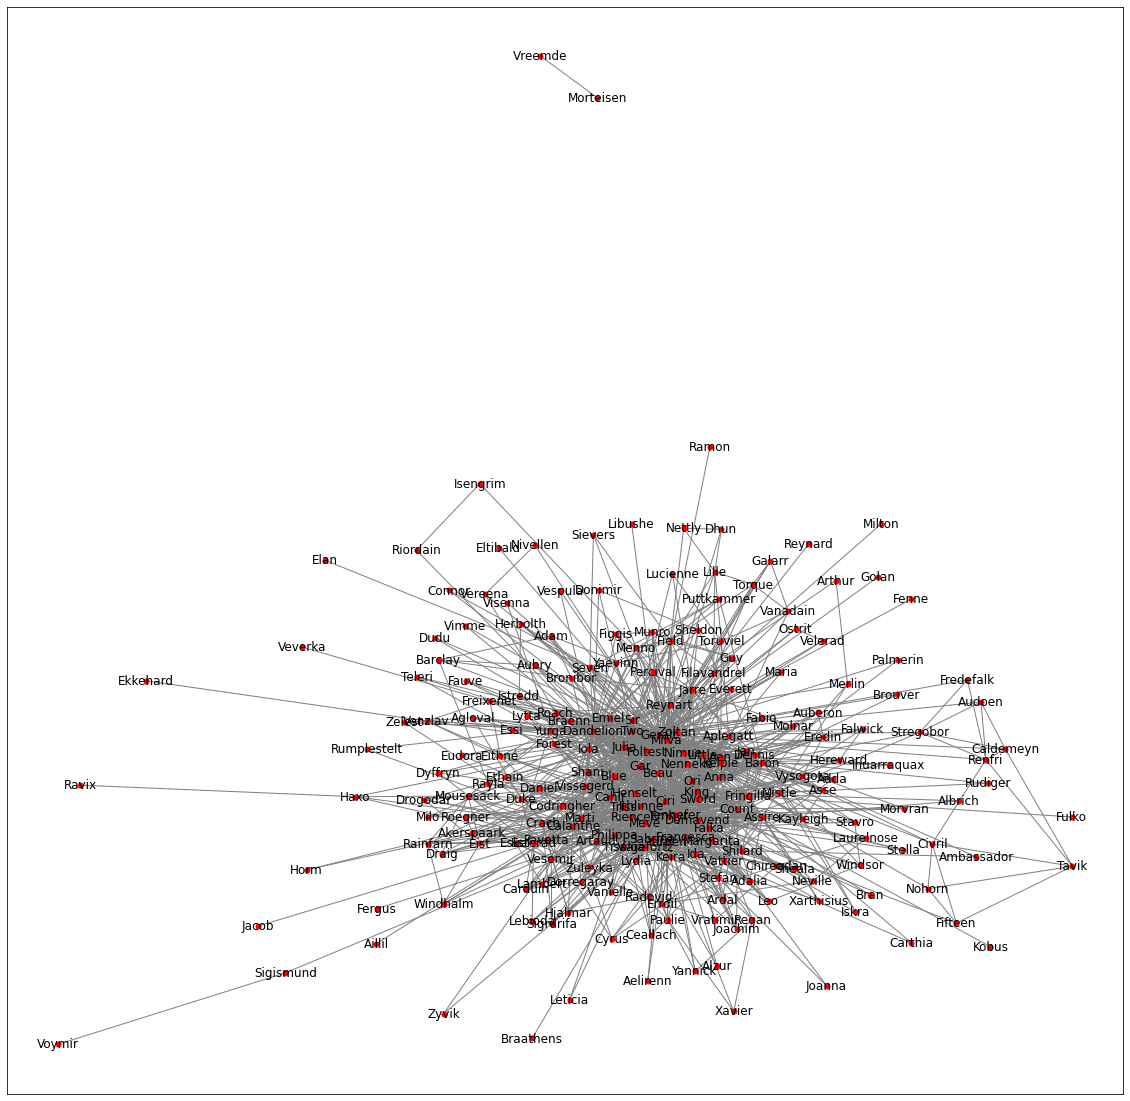

In [267]:
#Create the network
G = create_network(df)
#Plotting the network graph
plot_graph(G)

As we can see here, Vreemde and Morteisen only have interactions with each other, so we can remove these characters to simplify our network analysis.

In [268]:
#Creating degrees
create_degrees(G)

Character  Degree
0       Geralt     137
1         Ciri     102
2     Yennefer      72
3    Dandelion      69
4        Emhyr      62
..         ...     ...
219     Voymir       1
220      Golan       1
221      Ravix       1
222     Milton       1
223       Elan       1

[224 rows x 2 columns]

As we can see, Geralt has the highest number of interactions, with 137 degrees (number of nodes adjacent to this edge), and there are several characters with only a single degree.

In [269]:
centrality_measures(G, 'degree')

Character  Centrality
0       Geralt    0.614350
1         Ciri    0.457399
2     Yennefer    0.322870
3    Dandelion    0.309417
4        Emhyr    0.278027
..         ...         ...
219     Voymir    0.004484
220      Golan    0.004484
221      Ravix    0.004484
222     Milton    0.004484
223       Elan    0.004484

[224 rows x 2 columns]

With a degree centrality of 0.61, Geralt is the most central character. 

Let's create a new Dataframe now, removing Vreemde and Morteisen.

In [270]:
df2 = df[df['Source'] != 'Morteisen']
df2 = df2[df2['Source'] != 'Vreemde']
df2.head()

Unnamed: 0   Source   Target        Type  Weight  book
0           0  Velerad   Geralt  Undirected       1     1
1           1   Geralt  Foltest  Undirected       5     1
2           2  Foltest   Geralt  Undirected       4     1
3           3     Adda   Geralt  Undirected       1     1
4           4   Geralt   Ostrit  Undirected       4     1

Since there are 7 books, we can perform detailed network analyses for each book, however for the sake of simplicity, we will limit the analysis to 1 book, and do a comparative analysis for all 7 books at the end.

In [271]:
books = list(range(1,8))
d = {}
for name in books:
    d[name] = df2[df2['book'] == name]

<Figure size 72x72 with 0 Axes>

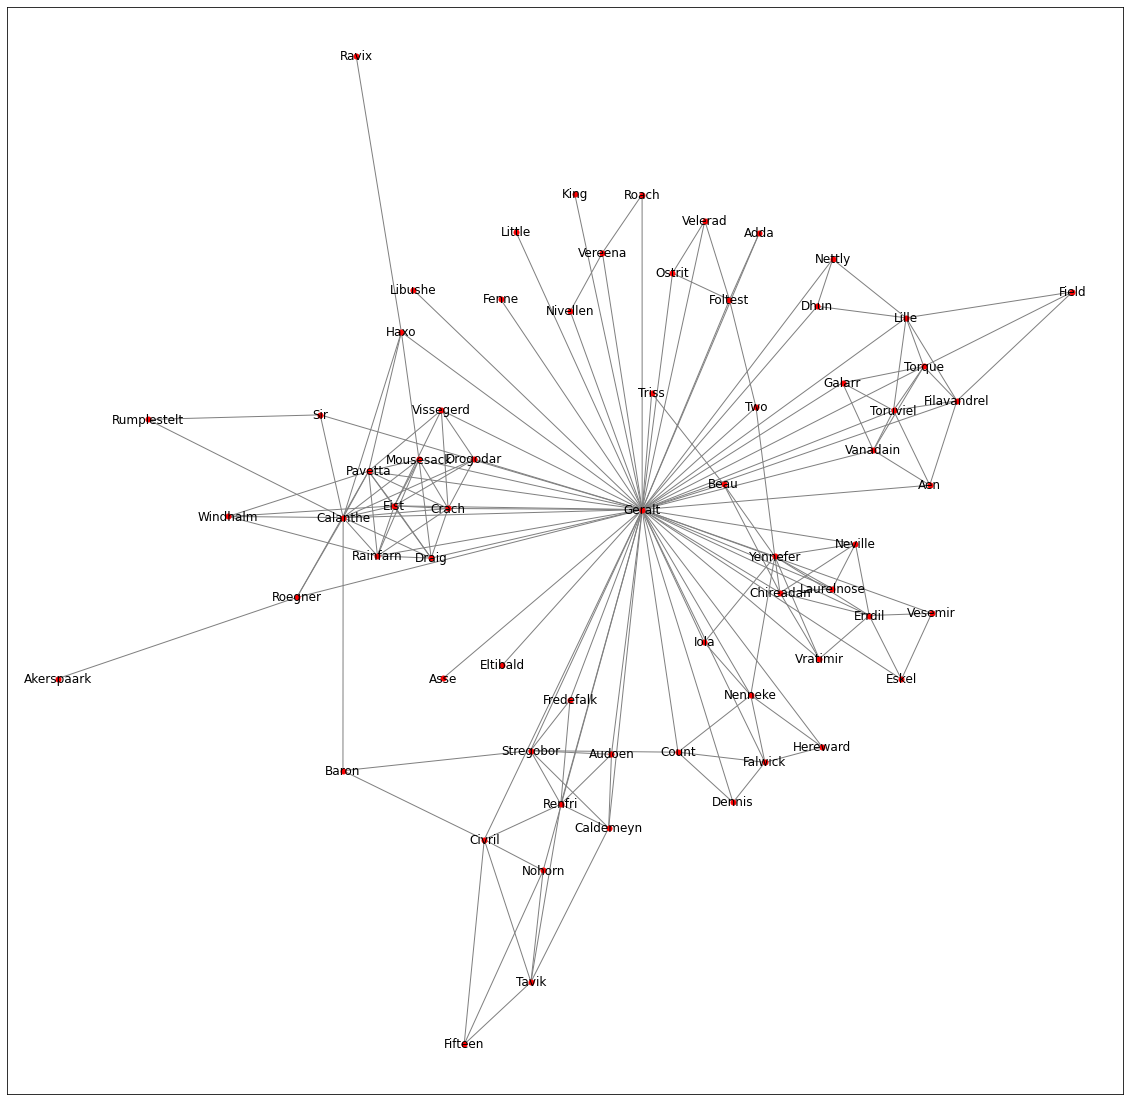

<Figure size 72x72 with 0 Axes>

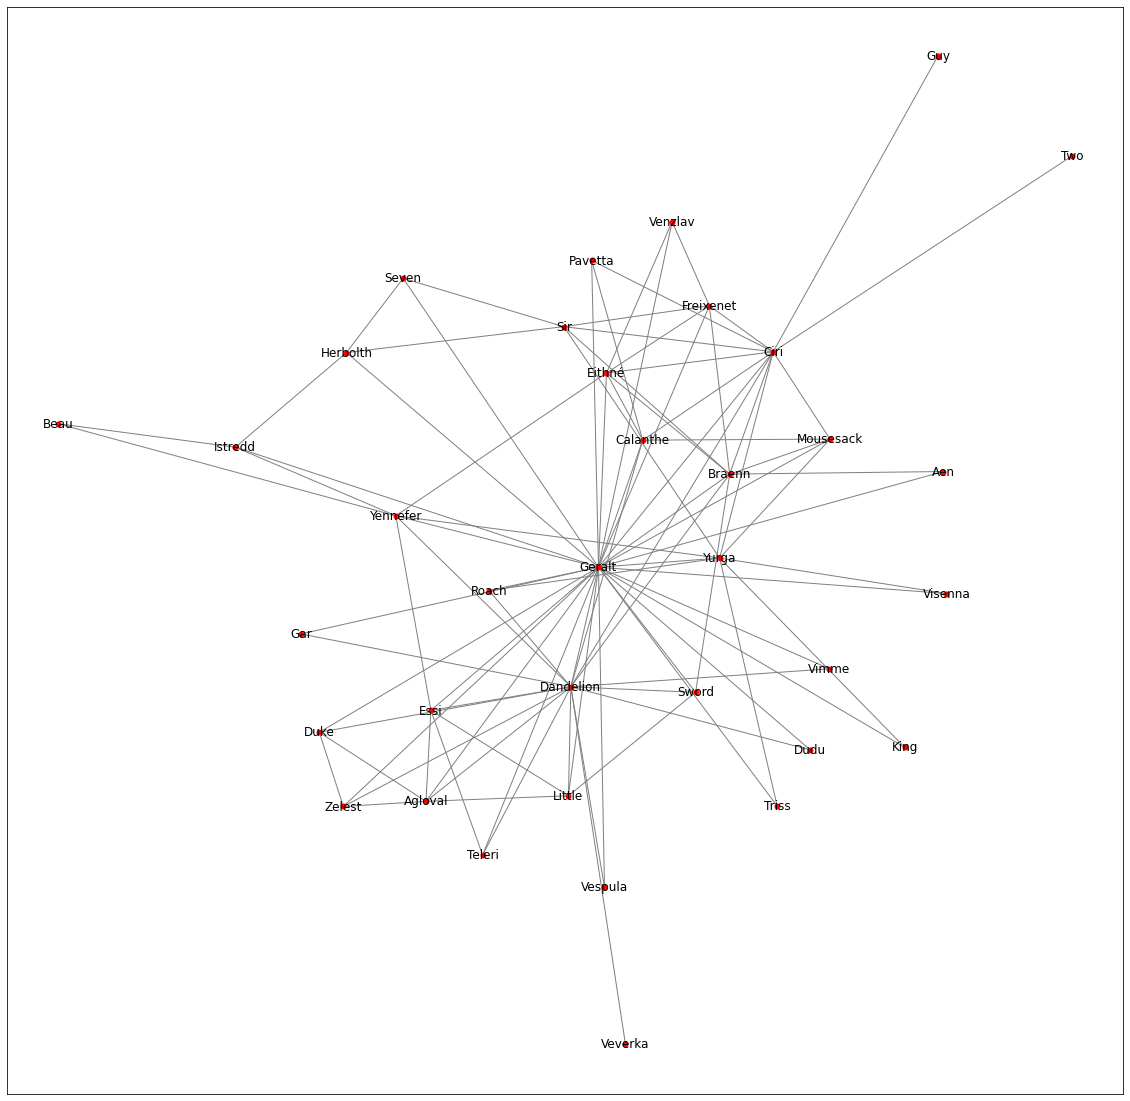

<Figure size 72x72 with 0 Axes>

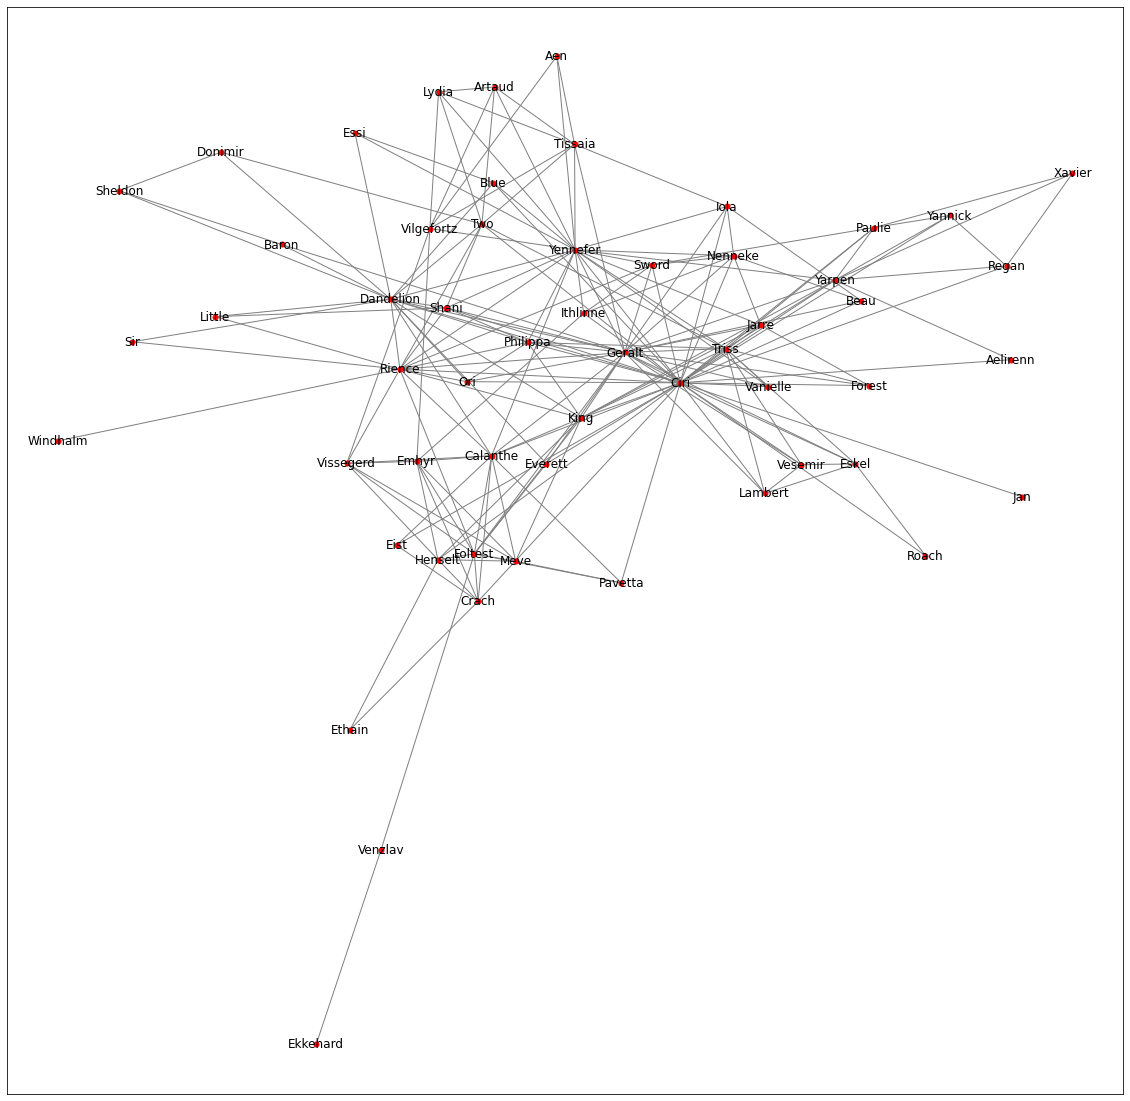

<Figure size 72x72 with 0 Axes>

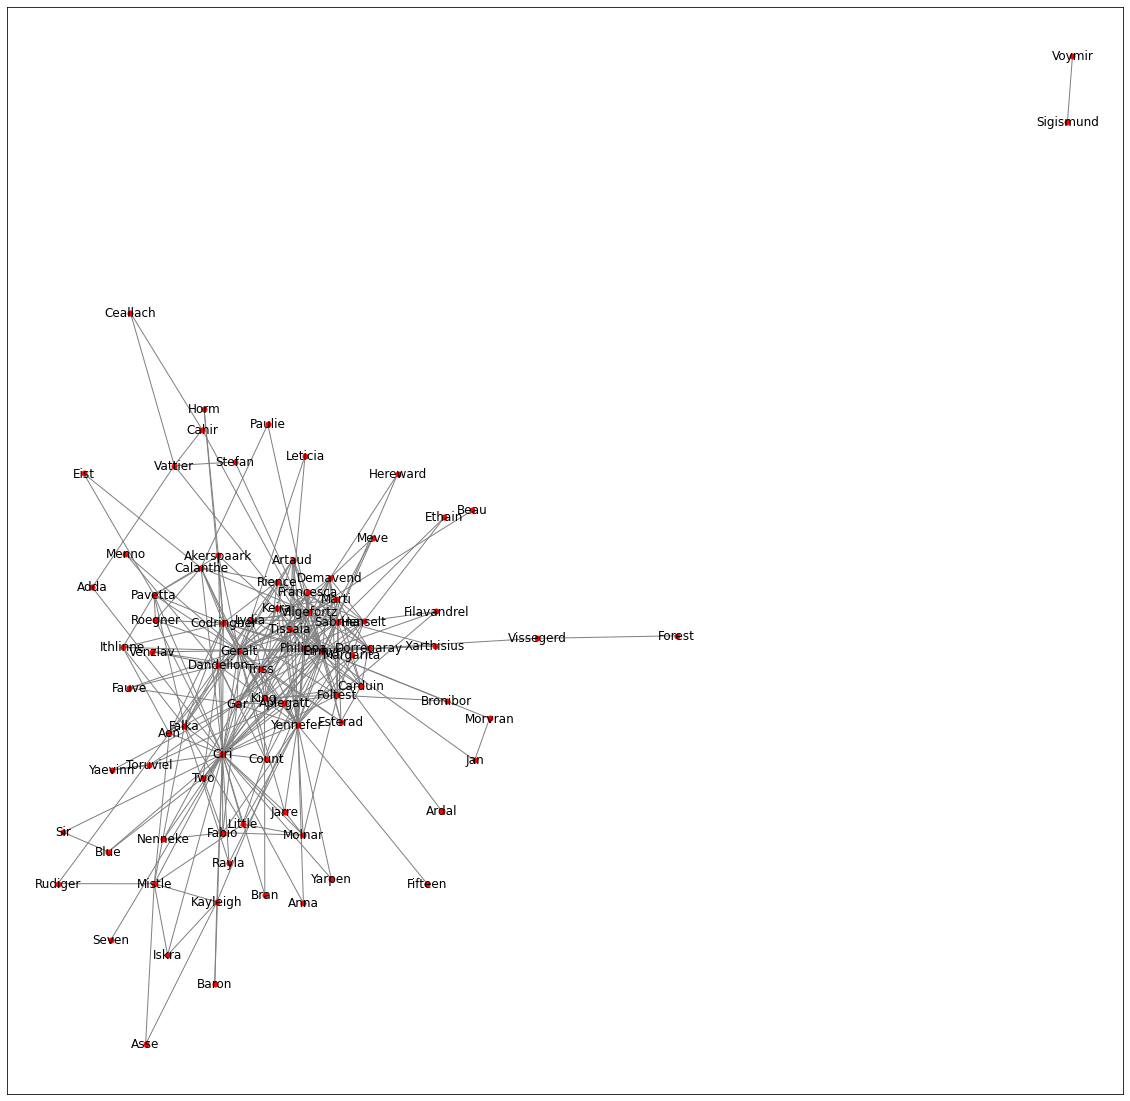

<Figure size 72x72 with 0 Axes>

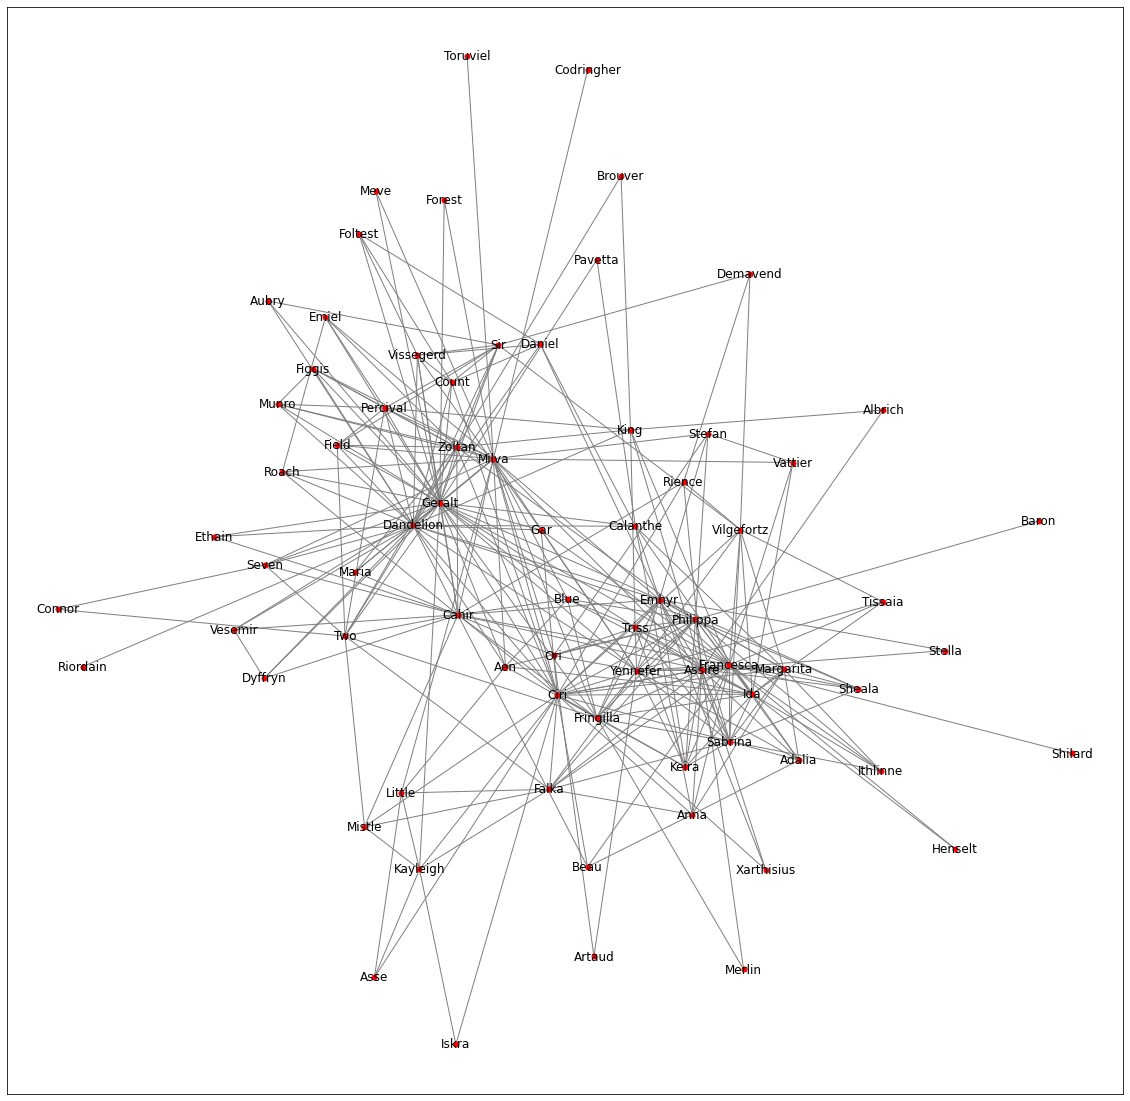

<Figure size 72x72 with 0 Axes>

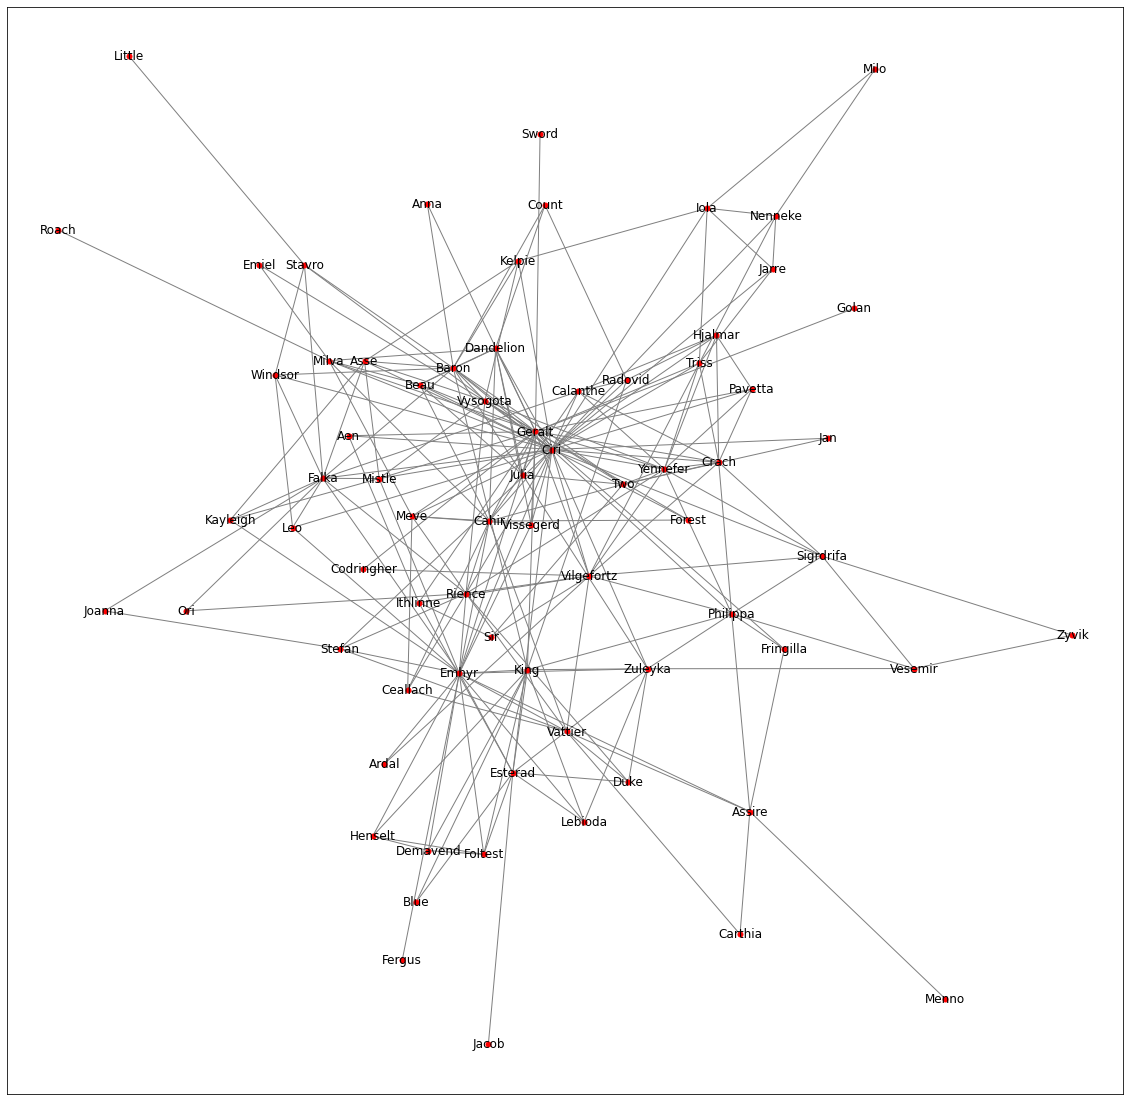

<Figure size 72x72 with 0 Axes>

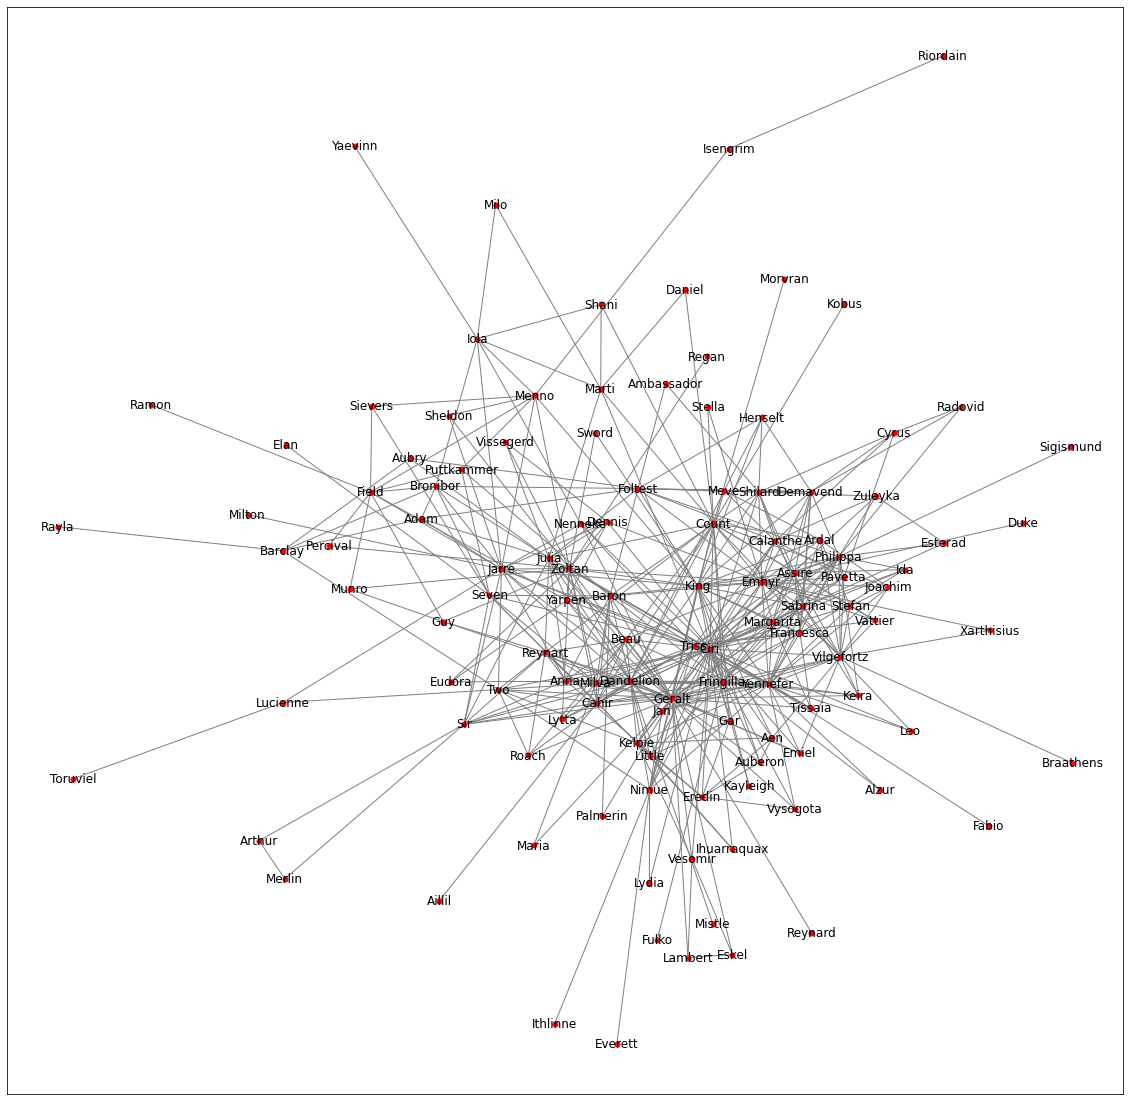

In [272]:
#Plot network graphs for each book to decide which book to perform network analysis on
for i in d:
    plt.figure(figsize=(1, 1))
    plot_graph(create_network(d[i]))

Books 5 and 6 are interesting books to look into, as they seem to have more than one central character, with a few smaller networks within the major network. So we will proceed with Book 5. 

In [273]:
J = create_network(d[5])
J_deg = create_degrees(J)
#Looking at the top 10 characters with highest number of degrees
J_deg.head(10)

Character  Degree
0     Geralt      35
1  Dandelion      28
2      Milva      27
3       Ciri      26
4  Francesca      25
5     Assire      23
6   Philippa      21
7   Yennefer      21
8      Emhyr      20
9      Cahir      20

Degree Centrality finds the node with the highest number of edges, ie the most central node.

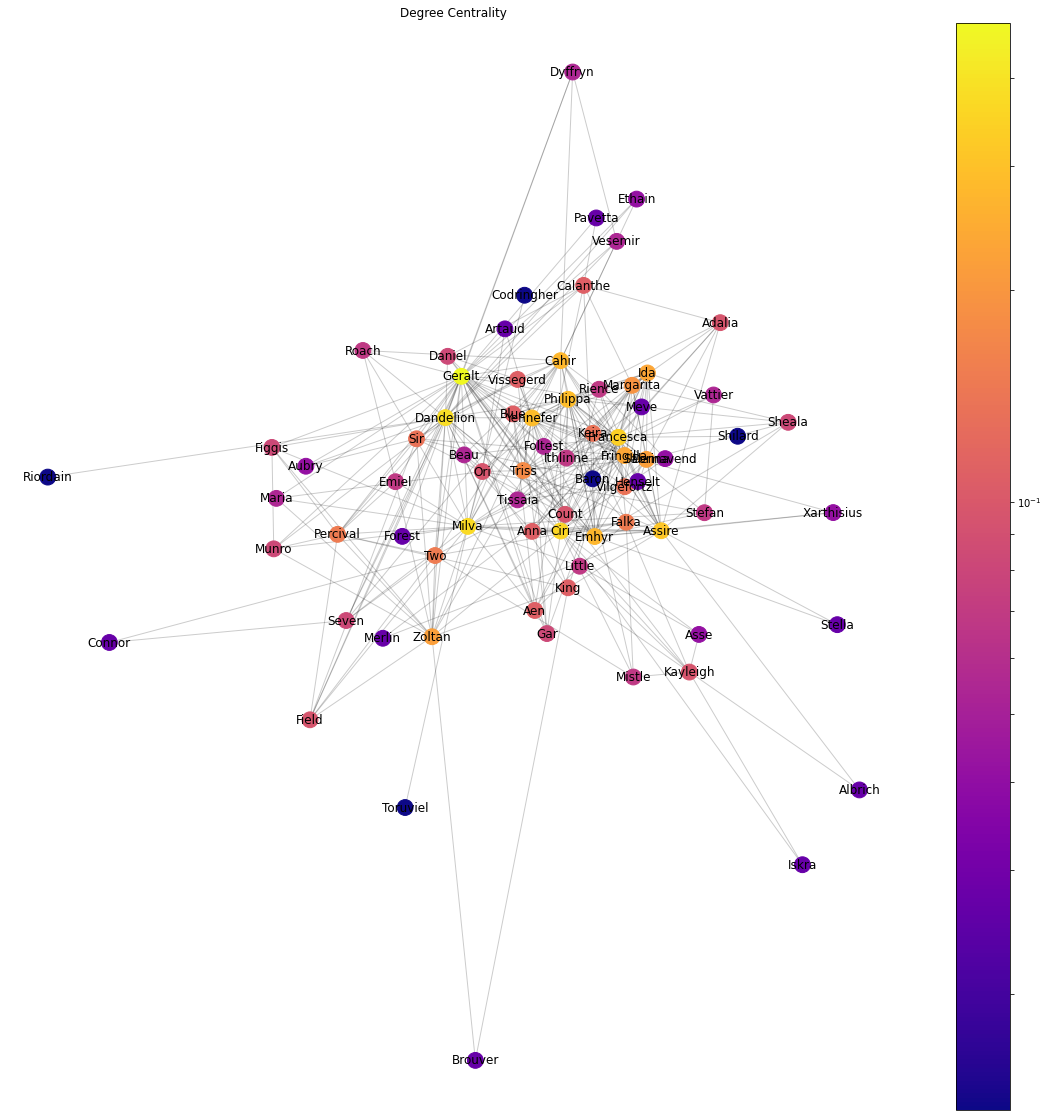

In [274]:
#plt.figure(figsize=(20, 20))
draw(J, pos, nx.degree_centrality(J), 'Degree Centrality')

Betweenness Centrality detects the node with the most influence over information in the network.

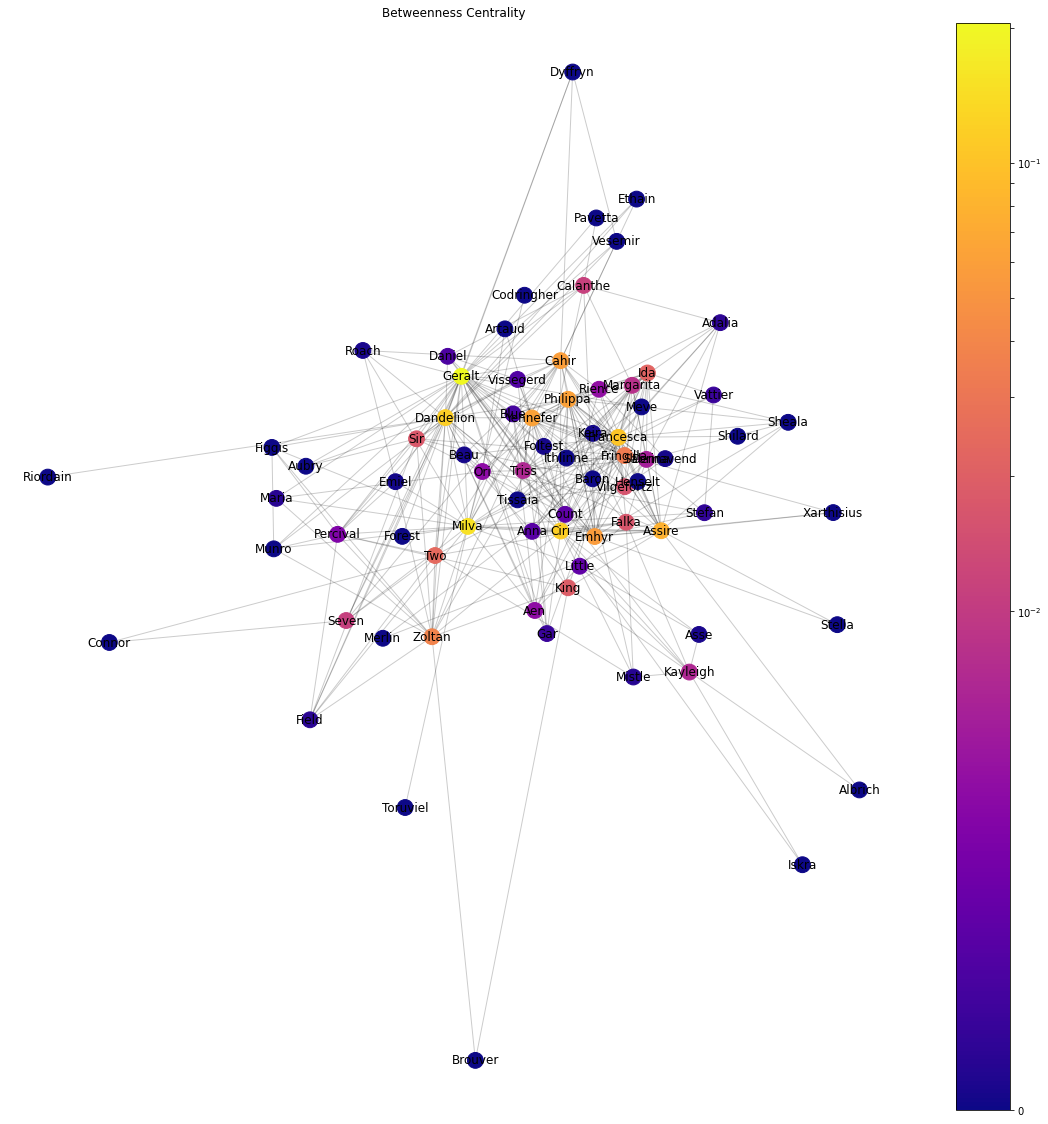

In [275]:
#plt.figure(figsize=(20, 20))
draw(J, pos, nx.betweenness_centrality(J), 'Betweenness Centrality')

Eigenvector centrality measures the centrality of a node based not only on its connections, but also based on the centrality of that node's connections.

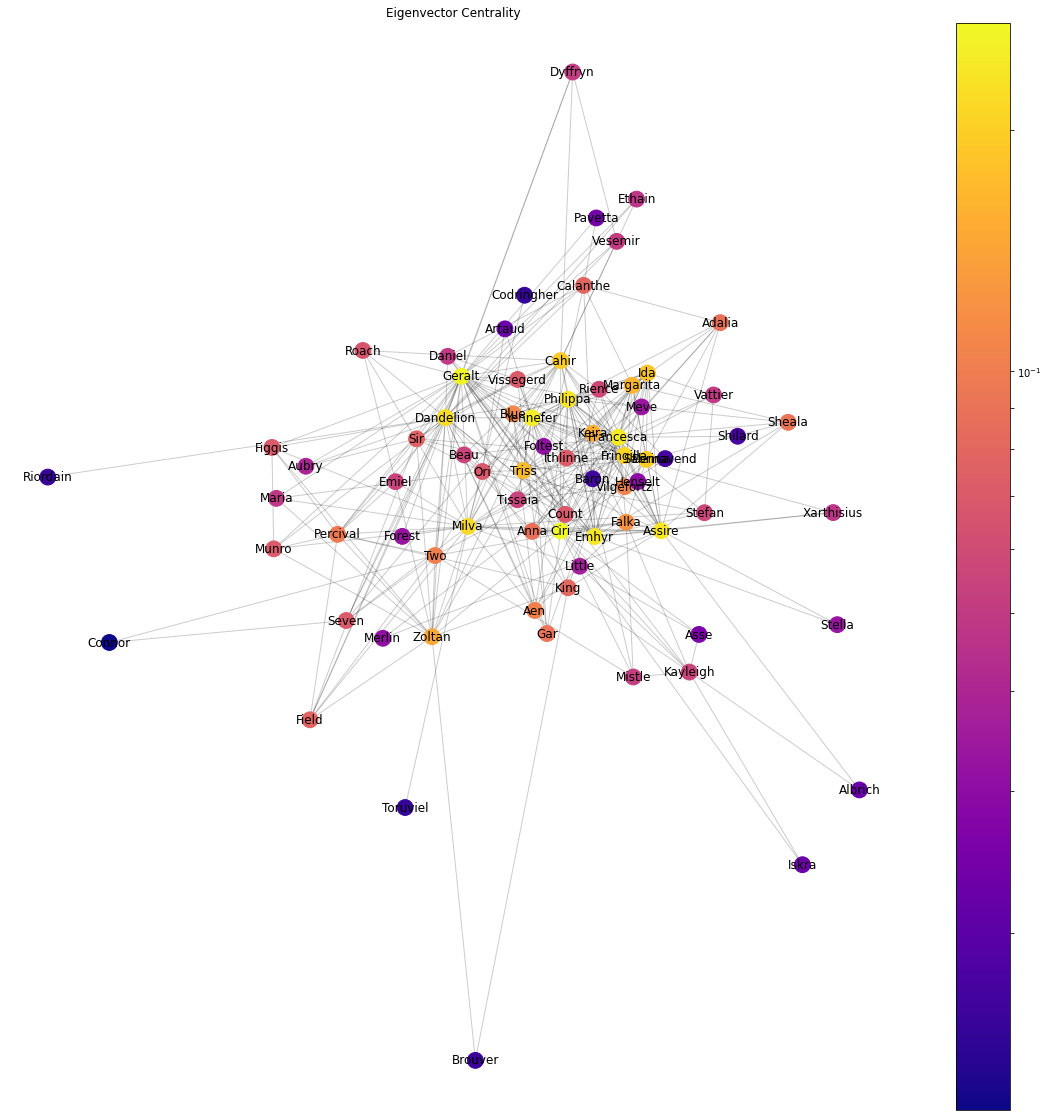

In [276]:
draw(J, pos, nx.eigenvector_centrality(J), 'Eigenvector Centrality')

Let's also take a look at the top 10 characters for each measure.

In [277]:
J_cen = centrality_measures(J, 'degree')
J_cen.head(10)

Character  Centrality
0     Geralt    0.479452
1  Dandelion    0.383562
2      Milva    0.369863
3       Ciri    0.356164
4  Francesca    0.342466
5     Assire    0.315068
6   Philippa    0.287671
7   Yennefer    0.287671
8      Emhyr    0.273973
9      Cahir    0.273973

In [278]:
J_bet = centrality_measures(J, 'betweenness')
J_bet.head(10)

Character  Centrality
0     Geralt    0.205560
1      Milva    0.148265
2  Dandelion    0.119029
3       Ciri    0.114777
4  Francesca    0.103260
5     Assire    0.077924
6   Yennefer    0.062322
7   Philippa    0.060737
8      Cahir    0.059268
9      Emhyr    0.056971

In [279]:
J_eig = centrality_measures(J, 'eigenvector')
J_eig.head(10)

Character  Centrality
0       Ciri    0.271734
1     Geralt    0.263759
2   Yennefer    0.248333
3  Francesca    0.244247
4     Assire    0.236265
5      Emhyr    0.235955
6   Philippa    0.232116
7  Dandelion    0.222110
8      Milva    0.216370
9  Fringilla    0.209261

Some interesting points of note, while it's natural to expect that the characters with the highest number of connections would consistently rank near the top for most measures, this is actually *not* the case. Of course, Geralt ranks in the top two for all three measures, however he *is* the main character and primary protagonist, so this isn't a surprise.

Lets consider the characters Dandelion and Milva. While they rank 2nd and 3rd, and 3rd and 4th for degree and betweenness centralities respectively, they rank closer to last, 8th and 9th, for eigenvector centrality. This tells us that even though Dandelion and Milva have a lot of connections, they don't have *influential* connections, ie, connections that also have high number of connections.

On the other hand, Yennefer ranks closer to the end for degree and betweenness centralities, but ranks 3rd for eigenvector centrality. Which means that even though Yennefer has fewer connections, her connections are more infuential.

This simple analysis shows the importance of looking at different measures when performing a network analysis, and particularly shows the benefit of using an Eigenvector Centrality measure, which will help us make important decisions when it comes to real-world data.

Lets find the top 10 most influential characters, based on the Eigenvector Centrality in all 7 books and then explore their evolution across them.

In [280]:
G_eig = centrality_measures(G, 'eigenvector')[0:10]
G_eig

Character  Centrality
0      Geralt    0.302578
1        Ciri    0.285643
2    Yennefer    0.227348
3       Emhyr    0.211155
4   Dandelion    0.205688
5    Philippa    0.176478
6       Triss    0.172492
7  Vilgefortz    0.165793
8        King    0.158654
9         Two    0.138634

In [281]:
inf_char = []
for char in G_eig['Character']:
    inf_char.append(char)

In [282]:
df_list = []
for i in range(1,8):
    df_list.append(centrality_measures(create_network(d[i]), 'eigenvector'))
dfs = [df.set_index('Character') for df in df_list]
merged_df = pd.concat(dfs, axis=1)

In [283]:
top_10_df = merged_df[merged_df.index.isin(inf_char)]
top_10_df

Centrality  Centrality  Centrality  Centrality  Centrality  \
Character                                                                
Geralt        0.564441    0.504171    0.345112    0.309993    0.263759   
Yennefer      0.140393    0.179731    0.290813    0.275415    0.248333   
Two           0.077563    0.031278    0.130954    0.067003    0.102263   
Triss         0.064125    0.081085    0.202825    0.186918    0.172036   
King          0.055544    0.081085    0.211906    0.163158    0.080509   
Dandelion          NaN    0.348516    0.242217    0.166470    0.222110   
Ciri               NaN    0.266771    0.398215    0.284522    0.271734   
Philippa           NaN         NaN    0.194905    0.227632    0.232116   
Emhyr              NaN         NaN    0.072492    0.269641    0.235955   
Vilgefortz         NaN         NaN    0.060155    0.236009    0.105859   

            Centrality  Centrality  
Character                           
Geralt        0.328945    0.316437  
Yennefer      0.207525    0.241840  
Two           0.116770    0.098114  
Triss         0.138788    0.200616  
King          0.124514    0.199352  
Dandelion     0.151613    0.222620  
Ciri          0.431822    0.338097  
Philippa      0.133265    0.162818  
Emhyr         0.225932    0.202292  
Vilgefortz    0.179845    0.162319

Lets convert this table to make it easier to plot.

In [284]:
df_dict = dict(zip(top_10_df.index, top_10_df['Centrality'].values))
newdf = pd.DataFrame.from_dict(df_dict)

Text(0, 0.5, 'Eigenvector Centrality Measure')

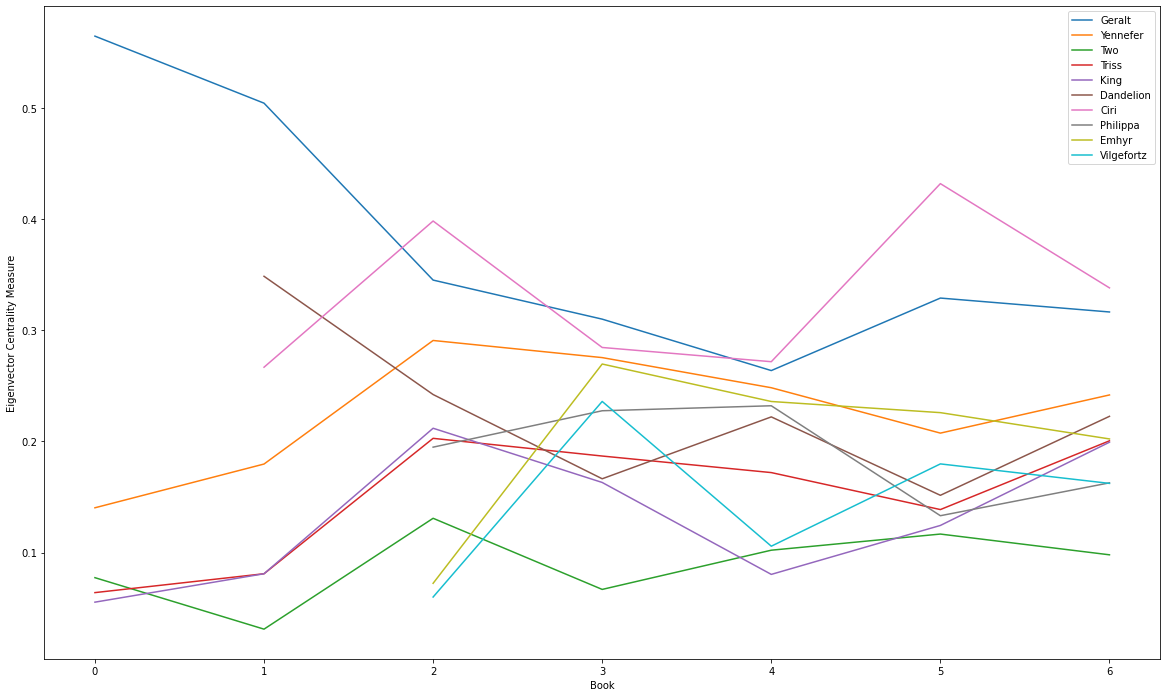

In [285]:
plt.rcParams["figure.figsize"] = (20,12)

newdf.plot()
plt.xlabel('Book')
plt.ylabel('Eigenvector Centrality Measure')

Using the above plot, we can gain a sense for how the influential characters evolved during the story. While Geralt starts off as a highly influential character in Books 1 and 2, he faces a sharp drop by Book 3 and continues that way, with Ciri overtaking him in several books, namely Books 3, 5, 6 and 7.

Yennefer maintains a level of influence throughout all 7 books, while characters like Vilgefortz and Dandelion fluctuate in terms of their influence. 